In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Generate synthetic data: House prices increase with size, with some noise
np.random.seed(42)
house_sizes = np.random.randint(800, 4000, size=100)  # House sizes in sq.ft (800–4000)
house_prices = 50 * house_sizes + np.random.normal(0, 50000, size=100)  # Base price: $50/sq.ft + noise

# Create DataFrame
data = pd.DataFrame({'Size (sq.ft)': house_sizes, 'Price ($)': house_prices})

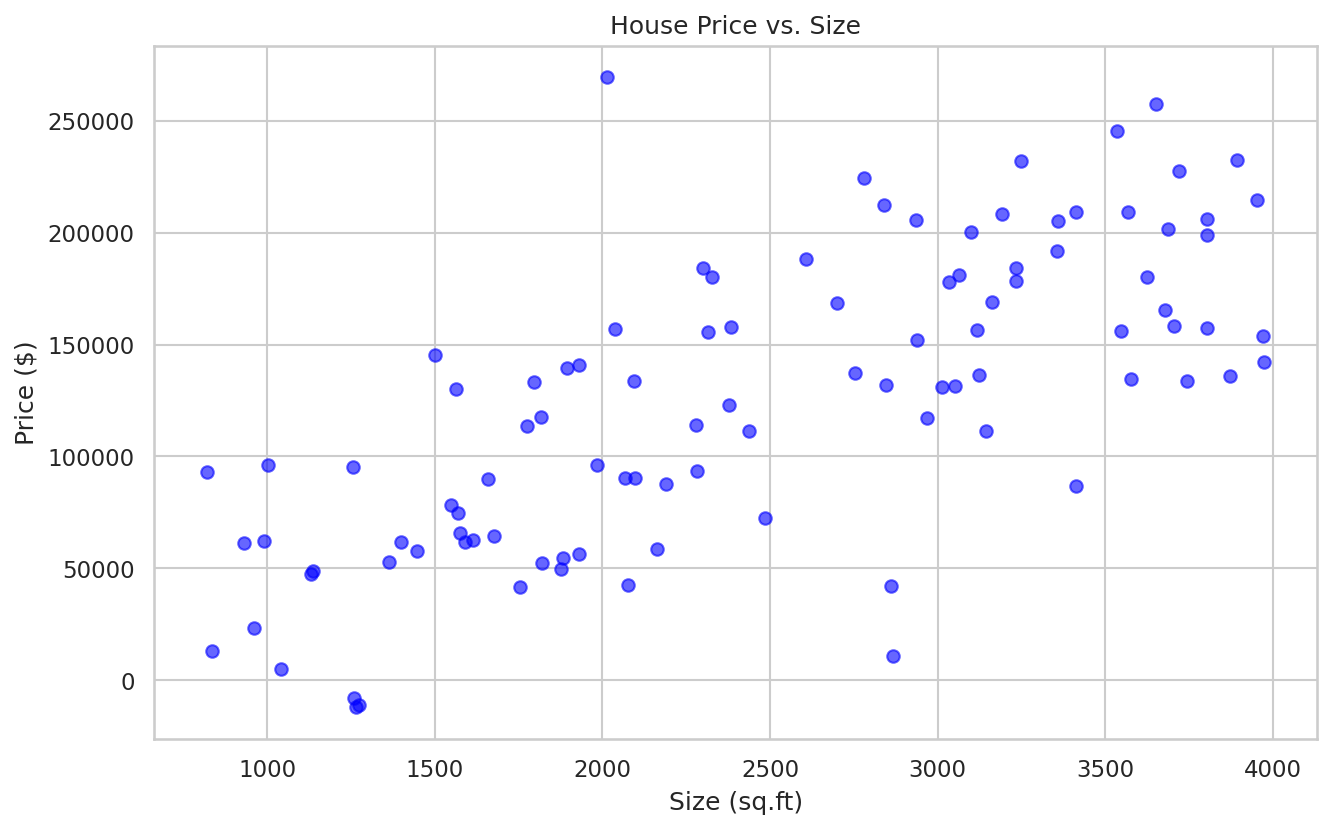

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Size (sq.ft)'], data['Price ($)'], color='blue', alpha=0.6)
plt.title('House Price vs. Size')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [19]:
X = data[['Size (sq.ft)']]  # Feature (house size)
y = data['Price ($)']        # Target (price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Print model coefficients
print(f"\nModel Equation: Price = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Size")

Mean Squared Error (MSE): 3270770238.18
R-squared (R²): 0.29

Model Equation: Price = -13024.95 + 55.47 * Size


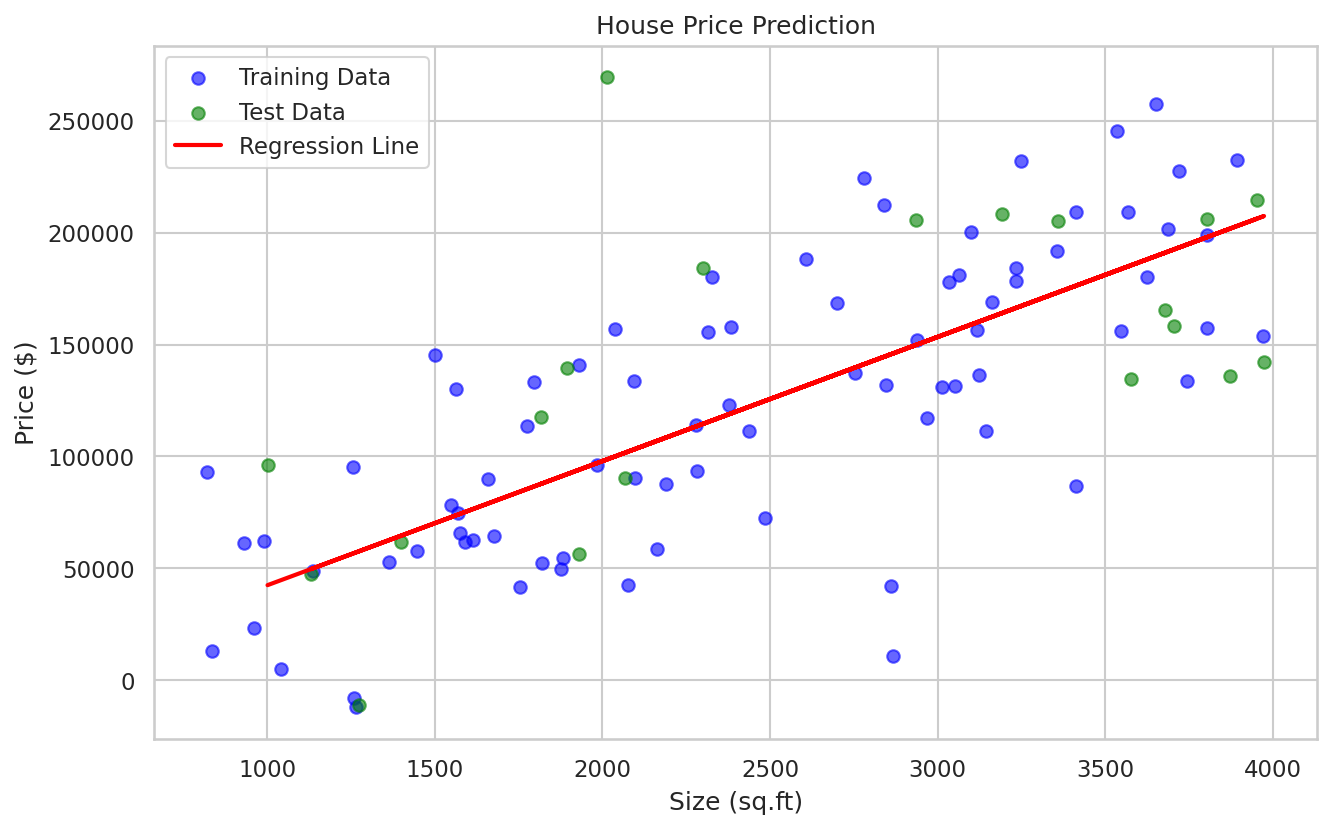

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('House Price Prediction')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

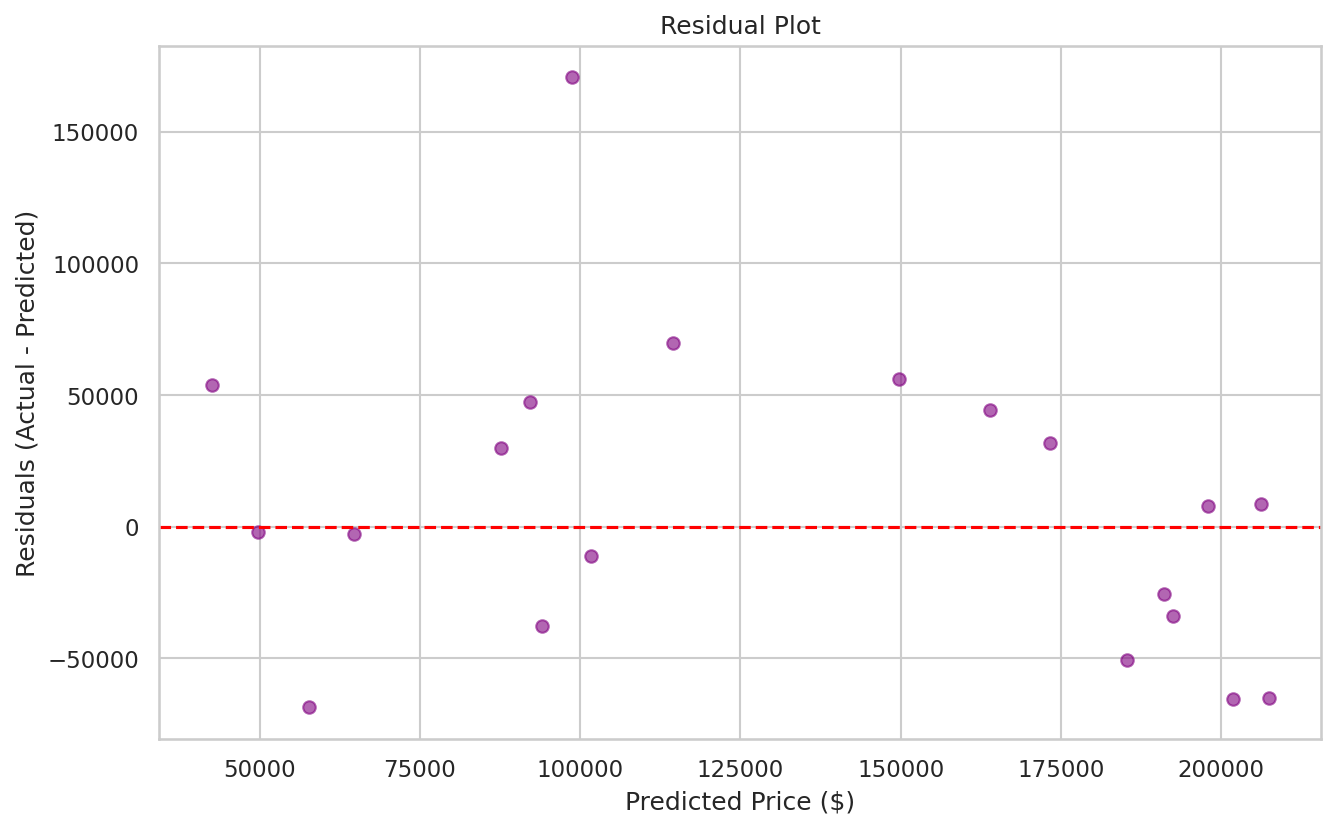

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()